# MNIST fashion data set

## Loading the MNIST fashion data set

In [1]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
import matplotlib.pyplot as plt
import numpy as np

## Preprocess the data

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Building all the models

### Underfit Model

In [4]:
# set up the layers

#underfit model
model_underfit = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.relu),
    keras.layers.Dense(32,activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model
model_underfit.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 10
history = model_underfit.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))



Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 186us/sample - loss: 2.3028 - acc: 0.0979 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 2/10
60000/60000 [==============================] - 10s 163us/sample - loss: 2.3028 - acc: 0.0979 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 3/10
60000/60000 [==============================] - 10s 164us/sample - loss: 2.3028 - acc: 0.0969 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 4/10
60000/60000 [==============================] - 9s 157us/sample - loss: 2.3028 - acc: 0.0982 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 5/10
60000/60000 [==============================] - 10s 159us/sample - loss: 2.3028 - acc: 0.0990 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 6/10
60000/60000 [==============================] - 11s 177us/sample - loss: 2.3028 - acc: 0.0986 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 7/10
60000/60000 [

In [6]:
test_loss, test_acc = model_underfit.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 95us/sample - loss: 2.3027 - acc: 0.1000
Test accuracy: 0.1


### Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

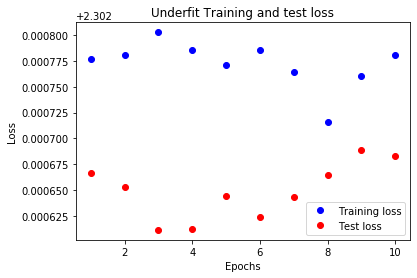

In [10]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Underfit Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

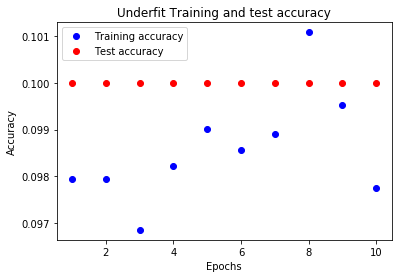

In [12]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Underfit Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Overfit Model

In [13]:
#Overfit model
model_overfit = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model_overfit.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 30
history = model_overfit.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 9s 144us/sample - loss: 0.4728 - acc: 0.8312 - val_loss: 0.3904 - val_acc: 0.8615
Epoch 2/30
60000/60000 [==============================] - 9s 143us/sample - loss: 0.3578 - acc: 0.8697 - val_loss: 0.3725 - val_acc: 0.8624
Epoch 3/30
60000/60000 [==============================] - 9s 154us/sample - loss: 0.3257 - acc: 0.8793 - val_loss: 0.3616 - val_acc: 0.8701
Epoch 4/30
60000/60000 [==============================] - 9s 154us/sample - loss: 0.2997 - acc: 0.8882 - val_loss: 0.3371 - val_acc: 0.8792
Epoch 5/30
60000/60000 [==============================] - 8s 140us/sample - loss: 0.2786 - acc: 0.8959 - val_loss: 0.3422 - val_acc: 0.8773
Epoch 6/30
60000/60000 [==============================] - 9s 146us/sample - loss: 0.2645 - acc: 0.9012 - val_loss: 0.3353 - val_acc: 0.8824
Epoch 7/30
60000/60000 [==============================] - 10s 168us/sample - loss: 0.2522 - acc: 0.9057 - val_

In [14]:
test_loss, test_acc = model_overfit.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 91us/sample - loss: 0.4340 - acc: 0.8890
Test accuracy: 0.889


### Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

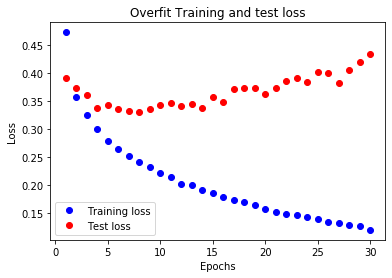

In [16]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Overfit Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

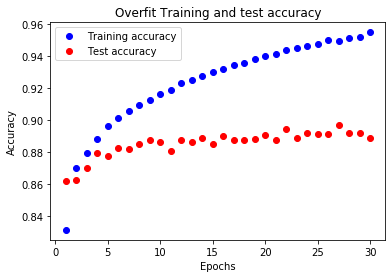

In [18]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Overfit Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Goodfit Model

In [19]:

#goodfit model
model_goodfit = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model_goodfit.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model_goodfit.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 190us/sample - loss: 0.6414 - acc: 0.7672 - val_loss: 0.4439 - val_acc: 0.8373
Epoch 2/20
60000/60000 [==============================] - 12s 196us/sample - loss: 0.4780 - acc: 0.8270 - val_loss: 0.4206 - val_acc: 0.8474
Epoch 3/20
60000/60000 [==============================] - 12s 207us/sample - loss: 0.4435 - acc: 0.8388 - val_loss: 0.4151 - val_acc: 0.8503
Epoch 4/20
60000/60000 [==============================] - 12s 192us/sample - loss: 0.4224 - acc: 0.8486 - val_loss: 0.3890 - val_acc: 0.8636
Epoch 5/20
60000/60000 [==============================] - 11s 190us/sample - loss: 0.4120 - acc: 0.8512 - val_loss: 0.3875 - val_acc: 0.8605
Epoch 6/20
60000/60000 [==============================] - 13s 218us/sample - loss: 0.3960 - acc: 0.8561 - val_loss: 0.3721 - val_acc: 0.8653
Epoch 7/20
60000/60000 [==============================] - 13s 218us/sample - loss: 0.3915 - acc: 0.8578 

In [20]:
test_loss, test_acc = model_goodfit.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 84us/sample - loss: 0.3499 - acc: 0.8744
Test accuracy: 0.8744


### Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

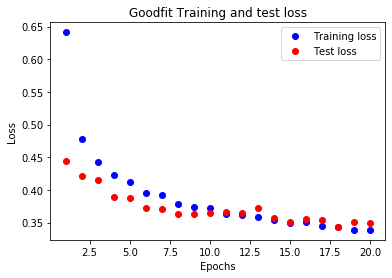

In [22]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Goodfit Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

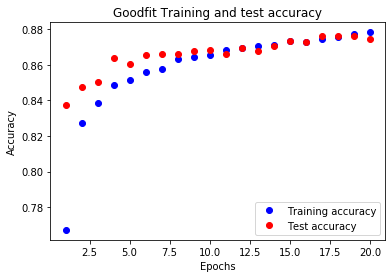

In [24]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Goodfit Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()